# Investigate Titanic Dataset

### What factors made passengers more likely to survive?

#### Some common questions to ask:
1. Which class people have more survival chances?
2. What are the implications of "children and women first" policy?
3. Does Age have any role in Surviving?
4. Where did more people Embarked at?
5. Does paying more fare means more chances of Survival?
6. Having more relatives has any impact on Survival Chances?

In [497]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style=None)

In [498]:
# load the titanic dataset
titanic_df = pd.read_csv("titanic_data.csv")

We loaded the data in titanic_raw dataframe. Let's see the structure of the data

In [499]:
# we can see only top five rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 12 columns. Observe that the Cabin column has a weird value 'NaN', which means Not a Number (Not available).
Some other columns might also have this kind of missing values. Let's check them

In [500]:
len(titanic_df)

891

In [501]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column has most number of missing values. Since cabin is not contributing anything for end result, we can remove that. Age column has 177/891 missing values. Embarked has only 2 missing values.

## Data Wrangling

Some columns have missing values. Artificialy imputing those values might change future distributions. So I want to just ignore those values. Embarked has only 2 missing values. This does not affect our distribution that much.

### Age

I am gonna create a new column named __who__ which tells whether the passenger is child, male or female. Missing values in Age will be treated as missing values in who column also. In future plots, these missing values will be taken care of so we don't need to worry about these missing values.

In [502]:
import math
def woman_child_or_man(passenger):
    age, sex = passenger
    if math.isnan(age):
        return
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [503]:
titanic_df["who"] = titanic_df[["Age","Sex"]].apply(woman_child_or_man, axis=1)

In [504]:
titanic_df['who'].value_counts()

man      413
woman    218
child     83
Name: who, dtype: int64

In [536]:
titanic_df['who'].isnull().sum()

177

### Embarked

Embarked column has only characters. I am creating a new column that tells us full names of Embarked towns.

In [505]:
titanic_df["Embarked_town"] = titanic_df.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})

We have two columns that represents number of relatives of passengers, __SibSp__ and __Parch__. We may want to find out whether there is any relation between number of relatives and survivalship rate. We will create a new column __rel__ to represent the number of relatives in which we will combine both __SibSp__ and __Parch__.

In [506]:
titanic_df['rel'] = titanic_df['SibSp'] + titanic_df['Parch']

### Pclass

Now we only have 1, 2 or 3 to represent classes. It is easy to recognise if we write it as First, Second, Third. I am creating a new column __class__ that maps these.

In [507]:
titanic_df['class'] = titanic_df['Pclass'].map({1: "First", 2: "Second", 3: "Third"})

## Data Exploration

In this section we will explore the data by asking different questions.

### Survived

### How many people survived the sinking ship?

In [508]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

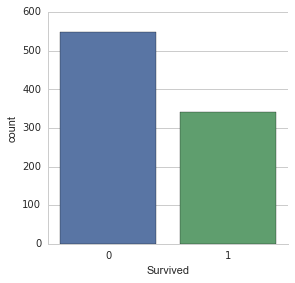

In [509]:
sns.factorplot('Survived', data = titanic_df, kind = 'count')

There are total 342 people survived the sinking ship.

### Pclass

### What is the class distribution of the passengers?

In [510]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

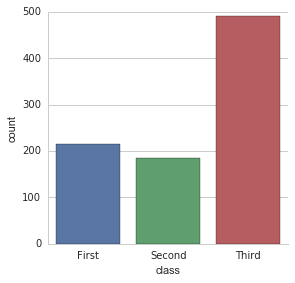

In [511]:
sns.factorplot('class', data = titanic_df, kind = 'count', order=['First', 'Second', 'Third'])

There are __216 First Class__, __184 Second Class__ and __491 third class__ passengers are there. So we can see that there are more passengers in __Third Class__ than other two classes combined.

### Sex

### How many people are male and how many are female? Are there any children? 

In [512]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

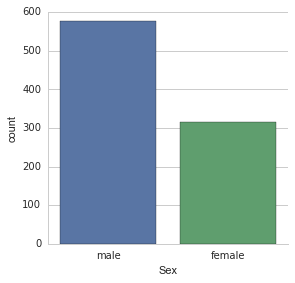

In [513]:
sns.factorplot('Sex', data = titanic_df, kind = 'count');

If we consider __Sex__ irrespective of __Age__, there are total __577 male__ and __314 Female__.

In [514]:
titanic_df['who'].value_counts()

man      413
woman    218
child     83
Name: who, dtype: int64

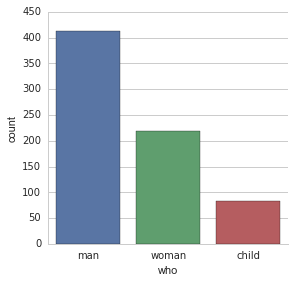

In [537]:
sns.factorplot('who', data = titanic_df, kind = 'count')

There are total __83__ children. Now men are __537__ and women are __271__.

### Age

### What is the Age distribution of passengers?

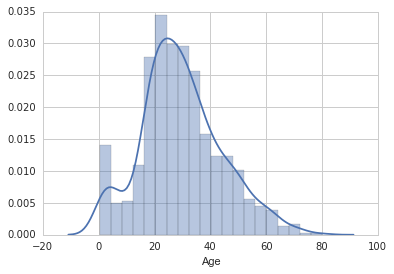

In [516]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.distplot(titanic_df['Age'].dropna())

### rel

### Are passengers have any relatives? If so, how many?

In [517]:
titanic_df['rel'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: rel, dtype: int64

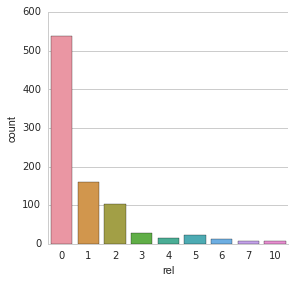

In [518]:
sns.factorplot('rel', data = titanic_df, kind = 'count')

Most of the people don't have any relatives. Some have __1__ or __2__ relatives and very few have more number of relatives.

### Fare

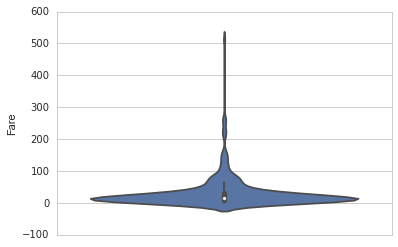

In [519]:
sns.violinplot(y = 'Fare', data = titanic_df)

__Fare__ has extreme outliers. Let's remove those extreme outliers. This is also called winsorization.

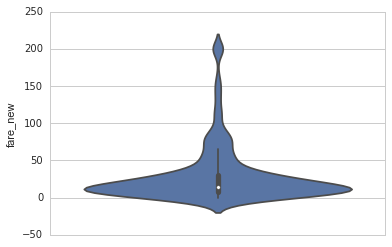

In [520]:
titanic_df["fare_new"] = titanic_df['Fare'].map(lambda x: min(x, 200))
sns.violinplot(y='fare_new', data = titanic_df)

### Embarked

### Where did the passengers Embarked at?

In [521]:
titanic_df['Embarked_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked_town, dtype: int64

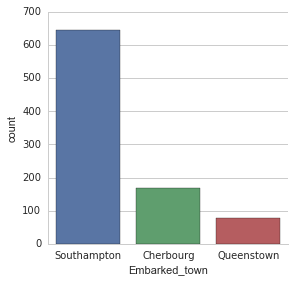

In [522]:
sns.factorplot('Embarked_town', data = titanic_df, kind='count')

Most of the passengers Embarked from __Southampton(646)__.

### Which class people paid more?

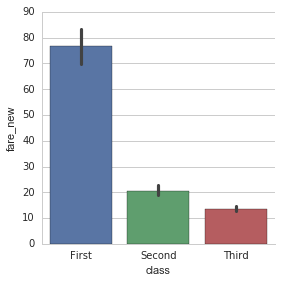

In [523]:
sns.factorplot('class', 'fare_new', data = titanic_df, kind = 'bar', order=['First', 'Second', 'Third'])

First class paid more than other two classes combined. Most of the first class people are uber rich.

### How many males or females in each class?

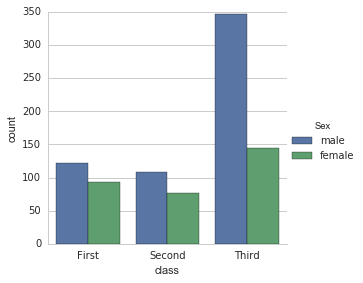

In [524]:
sns.factorplot('class', hue = 'Sex', data = titanic_df, kind='count', order=['First', 'Second', 'Third'])

There are disproportionately more males in Third class. Females are also more in third class but not as high as male counterparts.

### What about young children in each class?

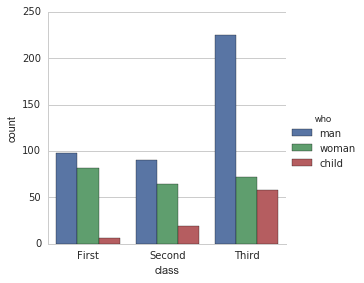

In [525]:
sns.factorplot('class', hue='who', data = titanic_df, kind='count', order=['First', 'Second', 'Third'])

Third class has more children. First class has the lowest number of children.

### Where did each class people embarked at?

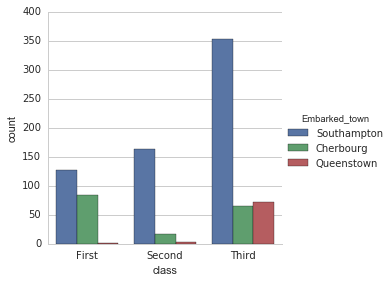

In [526]:
sns.factorplot('class', hue='Embarked_town', data = titanic_df, kind = 'count', order=['First', 'Second', 'Third'])

In each class more people Embarked at __Southampton__. Most of the Queenstown embarked people are Third class

### Which class people Survived more?

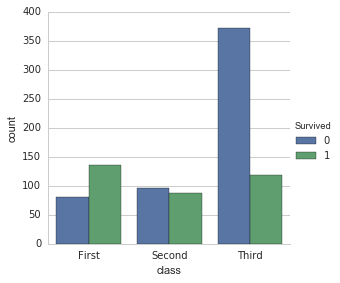

In [527]:
sns.factorplot('class', hue='Survived', data = titanic_df, kind='count', order=['First', 'Second', 'Third'])

__First class__ people have more survived people than perished people. In second class both are almost equal. In third class most people are perished. What might be the reason? In evacuation, first class people are given high priority.

### Where did Survived people embarked at?

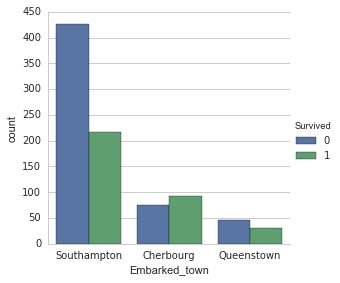

In [528]:
sns.factorplot('Embarked_town', hue='Survived', data = titanic_df, kind = 'count')

In Southampton more people are perished and Survived because most of the people embarked at Southampton. However, Cherbourg has more Survivors than perished people. This is correlated with More First class people Embarked at Cherbourg

### Who survived more among male, female and chidren?

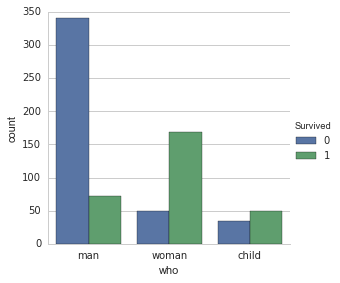

In [529]:
sns.factorplot('who', hue='Survived', data = titanic_df, kind = 'count')

There is high Survived/Perished ratio of woman. Children also have more Survived people. But take a look at Men. There is huge gap between Survived and Perished ones. This is the result of __Children and Women first__.

### Is having more relatives means more chances of Survival?

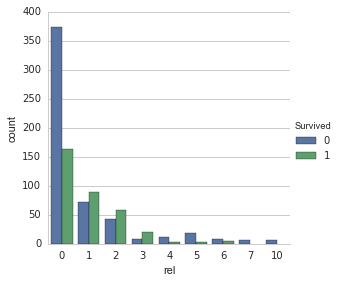

In [530]:
sns.factorplot('rel', hue='Survived', data = titanic_df, kind = 'count')

Not exactly, although more people with no relatives died and people with relatives 1,2 or 3 survived more, we can't tell exactly this is the reason.

### Did class and sex played any role in chances of Survival?

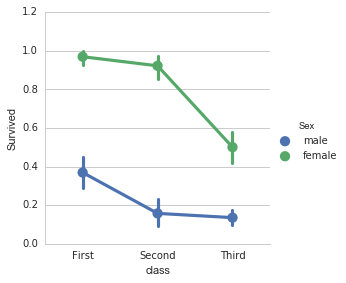

In [531]:
sns.factorplot('class', 'Survived', data = titanic_df, hue='Sex', order=['First', 'Second', 'Third'])

First class female has higher chances of survival, whereas third class Male has lower chances of survival.

### What if after including the children?

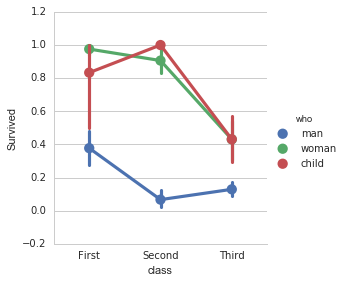

In [532]:
sns.factorplot('class', 'Survived', data = titanic_df, hue='who', order=['First', 'Second', 'Third'])

In First and Third class Women has high survival chances. In third Chidren has slightly high chances. As usual men has lower chances of survival whatever class they are in.

### Did age has any importance?

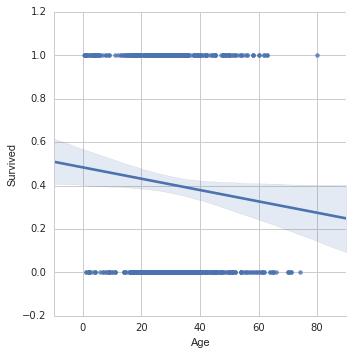

In [533]:
sns.lmplot('Age', 'Survived', titanic_df)

Higher the age lower the chances

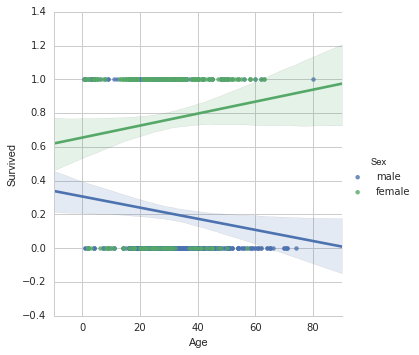

In [534]:
sns.lmplot('Age', 'Survived', titanic_df, hue = 'Sex')

For Females higher the age the chances are high in general. For males the higher the age the chances are very low to survive.

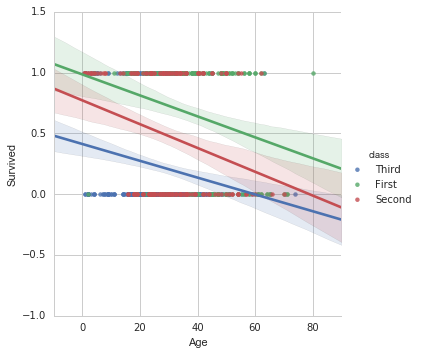

In [535]:
sns.lmplot('Age', 'Survived', titanic_df, hue = 'class')

Younger first class people have more chances of survival whereas older third class people have less chances of survival.

## Conclusion

The titanic dataset contains 891 observations of passengers. This dataset contains total 12 columns. The columns PassengerId, Name, Ticket and Column doesn't contribute to anlyze the data. My main motivation to analyze this data is to find out what factors made passengers more likely to survive? We can this into small sub problems. In Data Wrangling phase I created new column called 'who' which tells us whether the passenger is children, woman or man. For convenience I made changes to Pclass and Embarked. I Combined two columns ParCh and SibSp and created rel column, which tells us the number of relatives the passengers have. Fare column has extreme outliers. I created new column fare_new which will contain only fare value upto 200.

In total 891 passengers 549 died and 342 survived. Genderwise females have higher chances of survival than males. children also have higher chances of survival. Regarding socio economic status, first class people have higher survival chances where as third class people have lower chances. Third class has more passengers than two other classes. Because it has more number of people, in evacuation it will be very difficult to survive. First class people paid more to travel than other classes. First class Females has the highest chances to survive, whereas third class male has the lowest chances. For females high age contributing in surviving whereas high age reduces the chances for males. More passengers embarked at Southampton. More first class people embarked at Cherbourg. Most of the people don't have any relatives. Only a small number of people have more relatives.

## References

1. [A Complete Tutorial to Learn Data Science with Python from Scratch](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/)
2. [Udacity Discussions](https://discussions.udacity.com/c/nd002-p2-intro-to-data-analysis/p2-investigate-a-dataset)
3. [MarkDown Syntax](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
4. [Google + Stackoverflow]()
5. [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)